## DATA EXPLORATION ANALYSIS

### 1) Data overview 

### 2) KPI metrics 
    - DAU (daily active user)
    - MAU (month active user)
    - ARPU 
    - ARPPU
    - Retention 
    - Transaction rate 

### 3) Insights 
    - Trend
    - Issue of data 


In [1]:
import pandas as pd 
from sqlalchemy import create_engine
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [12]:
def get_date(timestamp):
    return timestamp[:10]

In [3]:
cd ../..

/Users/jerryliu/analysis


In [37]:
engine = create_engine('sqlite:///data/war_data.db', echo=False)
sql_session = "select * from session;"
df_session = pd.read_sql(sql_session, engine)
sql_battle = "select * from battle;"
df_battle = pd.read_sql(sql_battle, engine)
sql_cost = "select * from cost;"
df_cost = pd.read_sql(sql_cost, engine)

## COST 

In [39]:
df_cost.head(3)

,index,client_version,event_name,event_timestamp,is_premium,platform,player_name,product_name,real_currency_amount,real_currency_type,server_version,usd_cost,user_device_country,user_id,user_ip,user_is_spender,user_server_region,user_type
0,0,1.3.0,in_app_purchase_log_server,2018-10-25 08:24:27.164771,0,IOS_MOBILE,woiogu,gems_medium,9.99,USD,0.1.220,9.99,US,387e9319-0322-4aa7-bd1b-849ec4549236,85.185.154.2,1,US,PLAYER
1,1,1.3.0,in_app_purchase_log_server,2018-09-06 13:53:43.766954,0,IOS_MOBILE,mfyqqump,gems_small,4.99,USD,0.1.220,4.99,US,104865e8-b05c-43d4-91e0-9cd47eb4e336,68.141.250.207,1,US,PLAYER
2,2,1.3.0,in_app_purchase_log_server,2018-04-26 19:40:38.635197,0,IOS_MOBILE,ksebgpggrxi,gems_large,"49,99",EUR,0.1.220,"49,99",US,ce4ec61d-f1ff-4ac6-bad4-fd402242b8f3,218.132.111.36,1,EU,PLAYER


## SESSION 

In [41]:
df_session.head(3)

,index,client_version,event_name,event_timestamp,is_premium,login_attempt_id,platform,player_name,server_version,session_id,user_device_country,user_id,user_ip,user_is_spender,user_server_region,user_type
0,0,1.3.0,session_started,2018-03-01 07:10:48.499895,0,89c571bd-16de-4785-a051-f10aa27d54fa,IOS_MOBILE,luskfmpg,0.1.220,82e80eb5-42cd-4ed7-92c7-6e280f7bbcf1,US,85dff3d5-6f56-4601-9a24-400624f9a024,253.122.152.86,0,US,PLAYER
1,1,1.3.0,session_started,2018-05-01 13:58:47.838814,0,7ff39fa8-819c-4553-8cd0-4b000d338191,IOS_TABLET,myggq,0.1.220,0b76d245-a586-4b0c-a405-3dd09f255a65,US,0c91ed1d-40cc-419a-bd28-7a371e191f70,38.192.175.54,0,US,PLAYER
2,2,1.3.0,session_started,2018-09-29 22:42:47,0,d7c3b9fe-2464-45b2-90c8-825d3bb08335,IOS_TABLET,xuaushlwm,0.1.220,bfc766f4-ed5c-41a8-b887-f11378b3e483,US,d0c8f5e2-2f19-42dc-b279-0d7420ba90a2,89.252.254.157,0,EU,PLAYER


In [14]:
df_session['date'] = df_session['event_timestamp'].map(get_date)

In [5]:
len(df_session)

16375

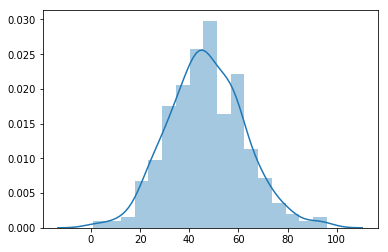

In [34]:
# distributuon of session date 
session_count = df_session.groupby('date')\
                .count()\
                .reset_index()\
                [['date','index']]\
                .set_index('date')
sns.distplot(session_count)

In [36]:
session_count.head(30).T

date,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2018-01-21,2018-01-22,2018-01-23,2018-01-24,2018-01-25,2018-01-26,2018-01-27,2018-01-28,2018-01-29,2018-01-30
index,11,13,25,34,39,49,57,56,58,44,...,59,56,65,45,51,45,53,34,45,59


In [10]:
#sns.distplot(pd.to_datetime(df_session.event_timestamp))

In [11]:
df_session.head(1)

,index,client_version,event_name,event_timestamp,is_premium,login_attempt_id,platform,player_name,server_version,session_id,user_device_country,user_id,user_ip,user_is_spender,user_server_region,user_type
0,0,1.3.0,session_started,2018-03-01 07:10:48.499895,0,89c571bd-16de-4785-a051-f10aa27d54fa,IOS_MOBILE,luskfmpg,0.1.220,82e80eb5-42cd-4ed7-92c7-6e280f7bbcf1,US,85dff3d5-6f56-4601-9a24-400624f9a024,253.122.152.86,0,US,PLAYER


In [21]:
df_session.user_device_country.value_counts()

US    16375
Name: user_device_country, dtype: int64

In [20]:
df_session.event_name.value_counts()

session_started    16375
Name: event_name, dtype: int64

In [19]:
df_session.user_type.value_counts()

PLAYER    16375
Name: user_type, dtype: int64

In [14]:
df_session.event_timestamp

0     2018-03-01 07:10:48.499895
1     2018-05-01 13:58:47.838814
2            2018-09-29 22:42:47
3     2018-07-05 01:45:05.074643
4     2018-08-20 16:41:35.010536
                 ...            
95    2018-10-26 15:58:45.859395
96    2018-01-25 19:19:44.962230
97           2018-07-15 22:42:46
98           2018-11-29 01:04:09
99    2018-08-02 02:45:25.792942
Name: event_timestamp, Length: 100, dtype: object